In [1]:
import pandas as pd
import numpy as np

path = "//home/font/Data/MM/neepu/"
filename_sanya = '三亚.csv'
filename_haikou = '海口.csv'
data_sanya = pd.read_csv((path+filename_sanya),index_col='Time')
data_haikou = pd.read_csv((path+filename_haikou),index_col='Time')
# mmercial housing sold = CHS,Consumer price index = CPI,Gross production = GP,housing price =HP
columns = ['Total_pop','PCDI(city)','PCDI(countryside)','CHS','Total_inv','CPI','GP','Balance','HP']

print(data_sanya.columns)
data_sanya.columns =columns
data_sanya.index = pd.to_datetime(data_sanya.index)
data_sanya = np.log(data_sanya)
data_sanya

Index(['年末人口(万)', '人均可支配收入(城镇)', '人均可支配收入(农村)', '商品房销售面积(平方米)',
       '房地产开发投资总额(万元)', '居民消费价格指数', '生产总值(亿元)', '储蓄存款余额(亿元)', '商品房价格(万元)'],
      dtype='object')


,Total_pop,PCDI(city),PCDI(countryside),CHS,Total_inv,CPI,GP,Balance,HP
Time,,,,,,,,,
2013-01-01,4.279440,10.055994,9.088399,14.392227,14.684512,4.638605,5.902333,14.993620,9.891099
2014-01-01,4.293195,10.120009,9.218705,14.406474,14.923162,4.636669,5.997099,15.054644,9.843614
2015-01-01,4.306629,10.198393,9.331230,13.806739,15.150553,4.633758,6.077229,15.113878,9.788105
2016-01-01,4.316020,10.267505,9.411484,13.865710,15.355910,4.613138,6.164493,15.258060,9.826184
2017-01-01,4.323205,10.345060,9.500020,14.162810,15.226606,4.630838,6.271461,15.298032,10.203796


In [2]:
data_haikou.columns =columns
data_haikou.index = pd.to_datetime(data_haikou.index)
data_haikou = np.log(data_haikou)
data_haikou

,Total_pop,PCDI(city),PCDI(countryside),CHS,Total_inv,CPI,GP,Balance,HP
Time,,,,,,,,,
2013-01-01,5.366583,10.013731,9.099185,14.734297,14.378268,4.637637,6.710011,6.872118,8.921275
2014-01-01,5.380404,10.104835,9.190240,14.974047,14.757089,4.633758,6.807537,6.979201,8.912955
2015-01-01,5.393946,10.186031,9.271435,14.493962,14.910692,4.626932,6.995491,7.081583,8.905071
2016-01-01,5.404028,10.258817,9.361773,15.010137,15.333699,4.617099,7.057278,7.140501,8.951570
2017-01-01,5.413252,10.334458,9.447702,15.187376,15.522247,4.634729,7.137016,7.276204,9.269395


In [3]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# 移动平均图
def draw_trend(timeSeries, size):
    f = plt.figure(facecolor='white')
    # 对size个数据进行移动平均
    rol_mean = timeSeries.rolling(window=size).mean()
    # 对size个数据进行加权移动平均
    rol_weighted_mean = pd.ewma(timeSeries, span=size)

    timeSeries.plot(color='blue', label='Original')
    rolmean.plot(color='red', label='Rolling Mean')
    rol_weighted_mean.plot(color='black', label='Weighted Rolling Mean')
    plt.legend(loc='best')
    plt.title('Rolling Mean')
    plt.show()

def draw_ts(timeSeries):
    f = plt.figure(facecolor='white')
    timeSeries.plot(color='blue')
    plt.show()

'''
　　Unit Root Test
   The null hypothesis of the Augmented Dickey-Fuller is that there is a unit
   root, with the alternative that there is no unit root. That is to say the
   bigger the p-value the more reason we assert that there is a unit root
'''
def testStationarity(ts):
    dftest = adfuller(ts)
    # 对上述函数求得的值进行语义描述
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    return dfoutput

def testStationarity2(ts,maxlog):
    dftest = adfuller(ts,maxlog)
    # 对上述函数求得的值进行语义描述
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    return dfoutput

# 自相关和偏相关图，默认阶数为31阶
def draw_acf_pacf(ts, lags=31):
    f = plt.figure(facecolor='white')
    ax1 = f.add_subplot(211)
    plot_acf(ts, lags=31, ax=ax1)
    ax2 = f.add_subplot(212)
    plot_pacf(ts, lags=31, ax=ax2)
    plt.show()

/home/font/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [10]:
for i in data_sanya.columns:
    print(testStationarity2(list(data_sanya[i]),maxlog=1))
    print(testStationarity2(list(data_haikou[i]),maxlog=1))

Test Statistic                 -0.000000
p-value                         0.958532
#Lags Used                      1.000000
Number of Observations Used     3.000000
Critical Value (1%)           -10.417191
Critical Value (5%)            -5.778381
Critical Value (10%)           -3.391681
dtype: float64
Test Statistic                 -0.000000
p-value                         0.958532
#Lags Used                      1.000000
Number of Observations Used     3.000000
Critical Value (1%)           -10.417191
Critical Value (5%)            -5.778381
Critical Value (10%)           -3.391681
dtype: float64
Test Statistic                  0.000000
p-value                         0.958532
#Lags Used                      1.000000
Number of Observations Used     3.000000
Critical Value (1%)           -10.417191
Critical Value (5%)            -5.778381
Critical Value (10%)           -3.391681
dtype: float64
Test Statistic                  0.000000
p-value                         0.958532
#Lags Used  

/home/font/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1353: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


In [7]:
import seaborn as sns
%matplotlib inline
def ShowCorrHeatMap(data_pd,method = 'pearson'):
    import matplotlib.pyplot as plt
    import seaborn as sns
    %matplotlib inline
    colormap = plt.cm.RdBu
    plt.figure(figsize=(14,12))
    plt.title('Pearson Correlation of Features', y=1.05, size=15)
    sns.heatmap(data_pd.astype(float).corr(method = method),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)
    plt.show()

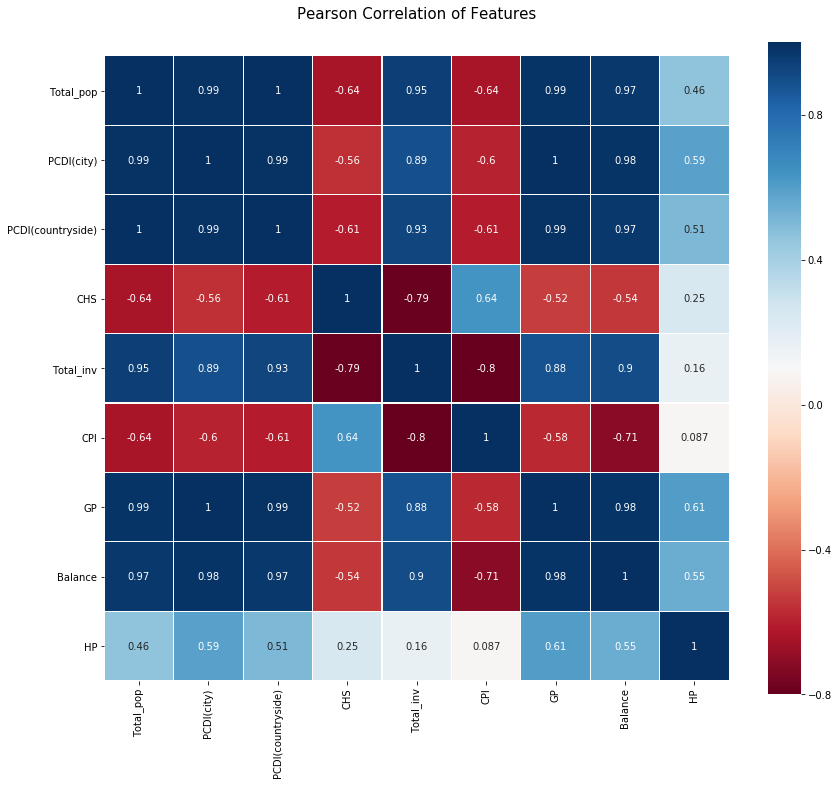

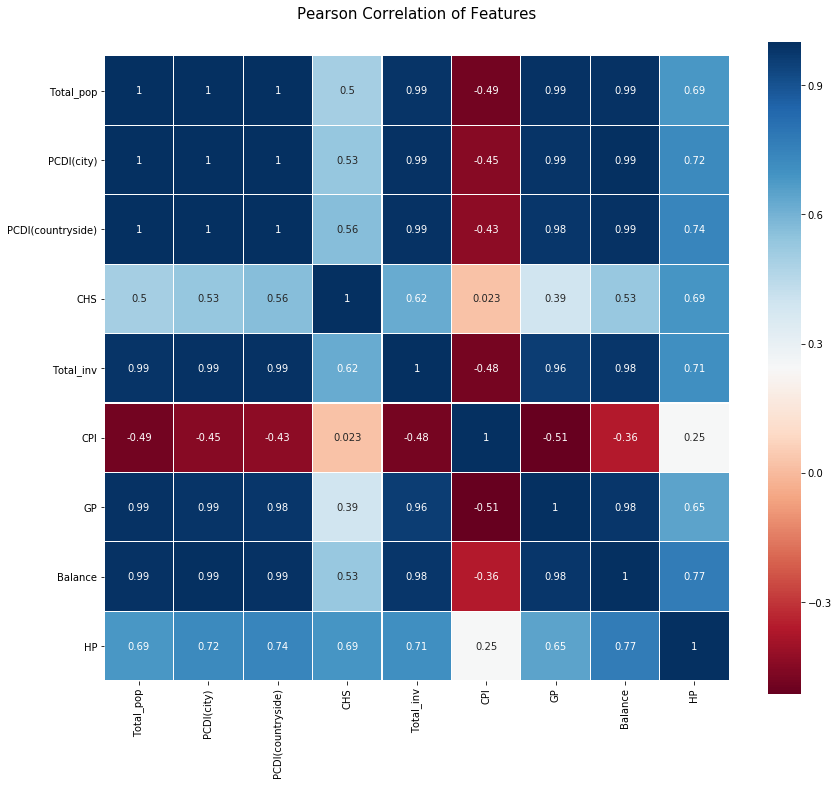

In [8]:
ShowCorrHeatMap(data_sanya)

ShowCorrHeatMap(data_haikou)